In [85]:
#sequences should have the same length
s1 = "ATTCTGCGC"
s2 = "TTCT-GTAG"
s3 = "C--CGCTTA"
s4 = "CTAC-CT--"

In [86]:
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

In [87]:
a = SeqRecord(Seq(s1), id = 's1')
b = SeqRecord(Seq(s2), id = 's2')
c = SeqRecord(Seq(s3), id = 's3')
d = SeqRecord(Seq(s4), id = 's4')

lst = [a,b,c,d]
print(lst)

[SeqRecord(seq=Seq('ATTCTGCGC'), id='s1', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('TTCT-GTAG'), id='s2', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('C--CGCTTA'), id='s3', name='<unknown name>', description='<unknown description>', dbxrefs=[]), SeqRecord(seq=Seq('CTAC-CT--'), id='s4', name='<unknown name>', description='<unknown description>', dbxrefs=[])]


In [88]:
from Bio.Align import MultipleSeqAlignment

In [89]:
align = MultipleSeqAlignment(lst)

In [90]:
from Bio import AlignIO

In [91]:
AlignIO.write(align,"C:/Users/f.vahidnejhad/Desktop/private/BIoPython/Data/file.phy", "phylip")

1

In [92]:
#نیاز به فایل با فرمت phy 
# برای ساخت درخت فیلوژنی

In [93]:
aln = AlignIO.read("C:/Users/f.vahidnejhad/Desktop/private/BIoPython/Data/file.phy", "phylip")

In [94]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

In [95]:
dm = DistanceCalculator('blosum62').get_distance(aln)

In [96]:
print(dm)

s1  0.000000
s2  0.905660    0.000000
s3  0.979167    1.000000    0.000000
s4  0.756098    0.878049    0.000000    0.000000
    s1  s2  s3  s4


In [97]:
import pandas as pd
lst = []
for i in dm:
    lst.append(i)
pd.DataFrame(lst)

,0,1,2,3
0,0.000000,0.905660,0.979167,0.756098
1,0.905660,0.000000,1.000000,0.878049
2,0.979167,1.000000,0.000000,0.000000
3,0.756098,0.878049,0.000000,0.000000


In [98]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

In [99]:
upgma = DistanceTreeConstructor().upgma(dm)

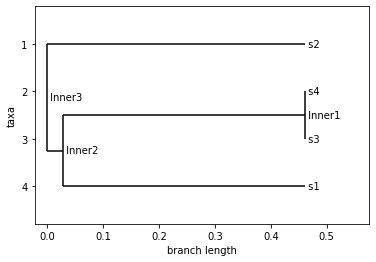

In [100]:
Phylo.draw(upgma)

In [101]:
nj = DistanceTreeConstructor().nj(dm)

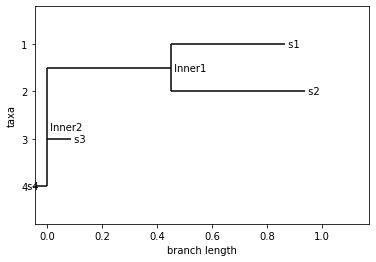

In [102]:
Phylo.draw(nj)

In [103]:
Phylo.write(upgma,"C:/Users/f.vahidnejhad/Desktop/private/BIoPython/Data/upgma.xml", "phyloxml")


1

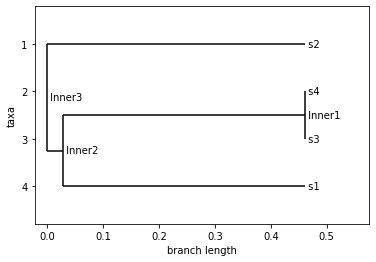

In [104]:
u = Phylo.read("C:/Users/f.vahidnejhad/Desktop/private/BIoPython/Data/upgma.xml", "phyloxml")
Phylo.draw(u)

In [105]:
t = Phylo.parse("C:/Users/f.vahidnejhad/Desktop/private/BIoPython/Data/upgma.xml", "phyloxml")
for i in t:
    print(i)

Phylogeny(rooted=True)
    Clade(branch_length=0.0, name='Inner3')
        Clade(branch_length=0.46117119190059824, name='s2')
        Clade(branch_length=0.027355134990029117, name='Inner2')
            Clade(branch_length=0.4338160569105691, name='Inner1')
                Clade(branch_length=0.0, name='s4')
                Clade(branch_length=0.0, name='s3')
            Clade(branch_length=0.4338160569105691, name='s1')


In [106]:
Phylo.convert("C:/Users/f.vahidnejhad/Desktop/private/BIoPython/Data/upgma.xml","phyloxml",
              "C:/Users/f.vahidnejhad/Desktop/private/BIoPython/Data/upgma.nhx","newick")

1